In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

Image-treat-1: sem data augmentation, com normalização e sem equalização

Image-treat-2: com data augmentation, com normalização e sem equalização

Image-treat-3: com data augmentation, com normalização e com equalização

Abordagem 4: com data augmentation, com normalização e com equalização, usando mae pra loss, batch de 128 --> pq eu observei muita alteração da direção do crescimento

Abordagem 5: sem data augmentation, com normalização e sem equalização, usando mae pra loss, batch de 128

Abordagem 6: vgg 16 com data augmentation, relu, equalização, normalização, usando mae pra loss, batch de 64 e sem transfer learning

In [2]:
activations = ['relu', 'lrelu']
img_treats=['image-treat-1', 'image-treat-2', 'image-treat-3', 'abordagem-4', 'abordagem-5', 'abordagem6', 'abordagem7']
nets = ['lenet', 'alexnet', 'vgg16']

activation, img_treat, net = activations[0], img_treats[5], nets[2]
activation, img_treat, net

('relu', 'abordagem6', 'vgg16')

In [3]:
 df_hist = pd.read_csv('callbacks/'+net+'/age/consolidados/history-regression-'+img_treat+ '-' + activation + '.csv').rename(
    columns={'epoch': 'Época', 'loss':'MAE Treino', 'val_loss': 'MAE Validação', 
             'mean_squared_error': 'RMSE Treino', 'val_mean_squared_error': 'RMSE Validação'})
df_hist['Época']+=1
df_hist = df_hist[1:]
#df_hist_lenet = df_hist[6:]

In [4]:
df_hist# = df_hist[16:]#.sort_values(by='MAE Validação')

,Época,MAE Treino,RMSE Treino,MAE Validação,RMSE Validação
1,1,83.152103,2.660953e+06,11.385614,223.640701
2,2,11.373098,2.161833e+02,12.049056,217.661892
3,3,11.342976,2.144701e+02,11.216676,212.382211
4,4,11.337689,2.143892e+02,11.500320,229.491232
5,5,11.322751,2.141153e+02,11.351976,221.394192
6,6,11.322759,2.139893e+02,11.306000,218.532328
7,7,11.301031,2.132916e+02,11.173649,208.567351
8,8,11.295692,2.134166e+02,11.196430,203.449537
9,9,11.311246,2.135700e+02,11.166808,206.849424
10,10,11.309891,2.136985e+02,11.161770,205.258170


In [5]:
df_hist[['RMSE Treino', 'RMSE Validação']] = np.sqrt(df_hist[['RMSE Treino', 'RMSE Validação']])

In [6]:
df_hist = df_hist.round(2)
#df_hist.drop(index=[i for i in range(16, 36)], inplace=True)
# df_hist.to_csv('callbacks/'+net+'/age/consolidados/history-regression-'+img_treat+ '-' + activation + '.csv', index=False)

In [7]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("", ["0.5","0.1"])

In [8]:
#df_hist.loc[2:].drop(['MAE Treino', 'MAE Validação'], axis=1)
df_hist.drop(['MAE Treino', 'MAE Validação'], axis=1)

,Época,RMSE Treino,RMSE Validação
1,1,1631.24,14.95
2,2,14.70,14.75
3,3,14.64,14.57
4,4,14.64,15.15
5,5,14.63,14.88
6,6,14.63,14.78
7,7,14.60,14.44
8,8,14.61,14.26
9,9,14.61,14.38
10,10,14.62,14.33


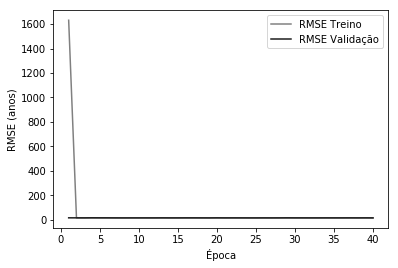

In [9]:
ax1 = df_hist.drop(['MAE Treino', 'MAE Validação'], axis=1).plot(x='Época', colormap=cmap)
ax1.set_ylabel("RMSE (anos)")
ax1.get_figure().savefig('graficos/result-hist/fig-history-' + img_treat+ '-' + net + '-' + activation +'-rmse.png')

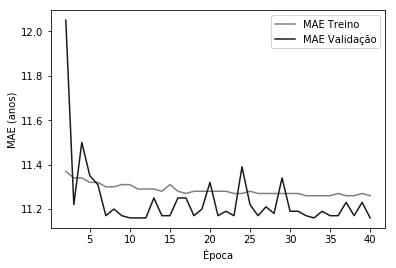

In [10]:
ax1 = df_hist[1:].drop(['RMSE Treino', 'RMSE Validação'], axis=1).plot(x='Época', colormap=cmap)
ax1.set_ylabel("MAE (anos)")
ax1.get_figure().savefig('graficos/result-hist/fig-history-' + img_treat+ '-' + net + '-' + activation +'-mae.png')